In [1]:
from temul.polarisation import get_strain_gradient
import atomap.api as am
import hyperspy.api as hs
import os


In [3]:
path_to_data = os.path.join(os.path.dirname(__file__), "data") 
os.chdir(path_to_data)


In [5]:
image = hs.load('Cropped_PTO-SRO_Aligned.hspy')


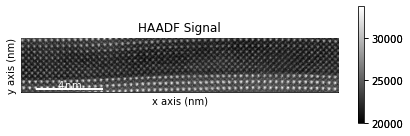

In [6]:
sampling = image.axes_manager[-1].scale #  nm/pix
units = image.axes_manager[-1].units
image.plot()

In [7]:
# Open the pre-made PTO-SRO atom lattice. 
atom_lattice = am.load_atom_lattice_from_hdf5("Atom_Lattice_crop.hdf5"))
sublattice1 = atom_lattice.sublattice_list[0] #  Pb-Sr Sublattice
sublattice2 = atom_lattice.sublattice_list[1] #  Ti-Ru Sublattice

SyntaxError: unmatched ')' (<ipython-input-7-db8d5245bcb0>, line 2)

In [8]:
# Open the pre-made PTO-SRO atom lattice. 

atom_lattice = am.load_atom_lattice_from_hdf5("Atom_Lattice_crop.hdf5")
sublattice1 = atom_lattice.sublattice_list[0] #  Pb-Sr Sublattice
sublattice2 = atom_lattice.sublattice_list[1] #  Ti-Ru Sublattice

In [9]:
# Plot the sublattice planes to see which zone_vector_index we use

sublattice2.construct_zone_axes(atom_plane_tolerance=1)
# sublattice2.plot_planes()

In [10]:
# Set up parameters for get_strain_gradient

zone_vector_index = 0
atom_planes = (2, 6) #  chooses the starting and ending atom planes
vmin, vmax = 1, 2
cmap = 'bwr' #  see matplotlib and colorcet for more colormaps
title = 'Strain Gradient Map'
filename = None #  Set to a string if you want to save the map

In [11]:
# Set the extra initial fitting parameters

p0 = [14, 10, 24, 173]
kwargs = {'p0': p0, 'maxfev': 1000}

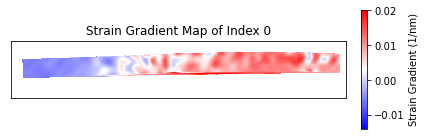

In [12]:
# We want to see the strain gradient in the SRO Sublattice

str_grad_map = get_strain_gradient(sublattice2, zone_vector_index,
                    sampling=sampling, units=units, cmap=cmap, title=title,
                    atom_planes=atom_planes, **kwargs)

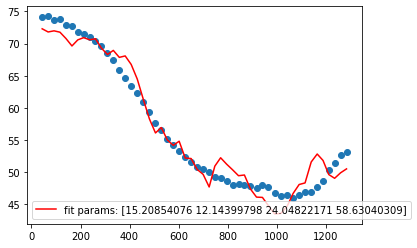

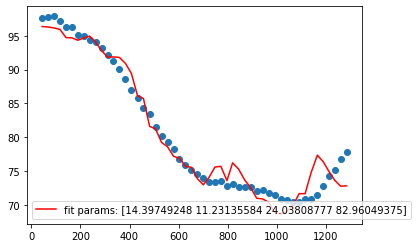

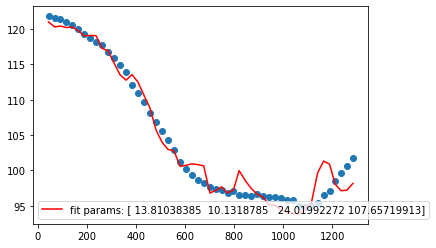

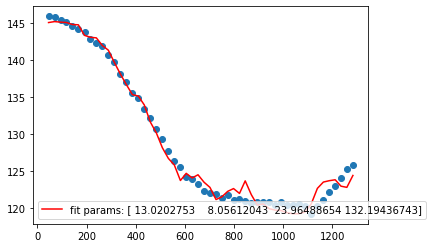

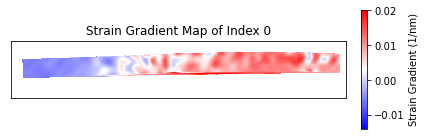

In [13]:
# When using plot_and_return_fits=True, the function will return the curve
#   fittings, and plot each plane.

str_grad_map, fittings = get_strain_gradient(sublattice2, zone_vector_index,
                    sampling=sampling, units=units, cmap=cmap, title=title,
                    atom_planes=atom_planes, **kwargs,
                    plot_and_return_fits=True)